## HEART DISEASE 

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart_disease_uci.csv")

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    col_median = df[col].median() if not df[col].isnull().all() else 0
    df[col] = df[col].fillna(col_median)

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    mode_value = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
    df[col] = df[col].fillna(mode_value)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_33536\1951870006.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_value)


In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_columns = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_data, columns= encoded_columns, index=df.index)
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)
df

,id,age,dataset,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,Cleveland,145.0,233.0,150.0,2.3,0.0,0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,67,Cleveland,160.0,286.0,108.0,1.5,3.0,2,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,3,67,Cleveland,120.0,229.0,129.0,2.6,2.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,4,37,Cleveland,130.0,250.0,187.0,3.5,0.0,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,41,Cleveland,130.0,204.0,172.0,1.4,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,VA Long Beach,127.0,333.0,154.0,0.0,0.0,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
916,917,62,VA Long Beach,130.0,139.0,140.0,0.5,0.0,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
917,918,55,VA Long Beach,122.0,223.0,100.0,0.0,0.0,2,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
918,919,58,VA Long Beach,130.0,385.0,140.0,0.5,0.0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [5]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,id,age,dataset,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,1.007386,Cleveland,0.705176,0.303643,0.489727,1.368109,0.0,0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.432034,Cleveland,1.518569,0.789967,-1.181478,0.611589,3.0,2,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,3,1.432034,Cleveland,-0.650479,0.266939,-0.345875,1.651804,2.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,4,-1.752828,Cleveland,-0.108217,0.459634,1.961979,2.502889,0.0,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,-1.328180,Cleveland,-0.108217,0.037541,1.365120,0.517024,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,0.051927,VA Long Beach,-0.270895,1.221235,0.648889,-0.806886,0.0,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
916,917,0.901224,VA Long Beach,-0.108217,-0.558893,0.091821,-0.334061,0.0,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
917,918,0.158089,VA Long Beach,-0.542026,0.211884,-1.499803,-0.806886,0.0,2,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
918,919,0.476575,VA Long Beach,-0.108217,1.698383,0.091821,-0.334061,0.0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Class distribution:
num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: proportion, dtype: float64


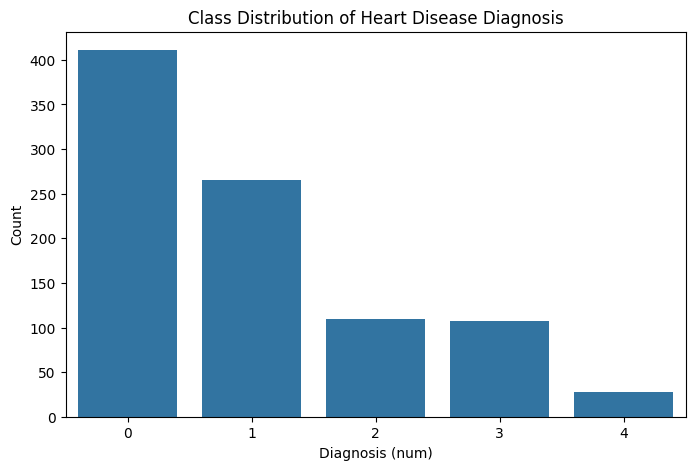

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
class_dist = df['num'].value_counts(normalize=True)
print("Class distribution:")
print(class_dist)

# Visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='num', data=df)
plt.title('Class Distribution of Heart Disease Diagnosis')
plt.xlabel('Diagnosis (num)')
plt.ylabel('Count')
plt.show()

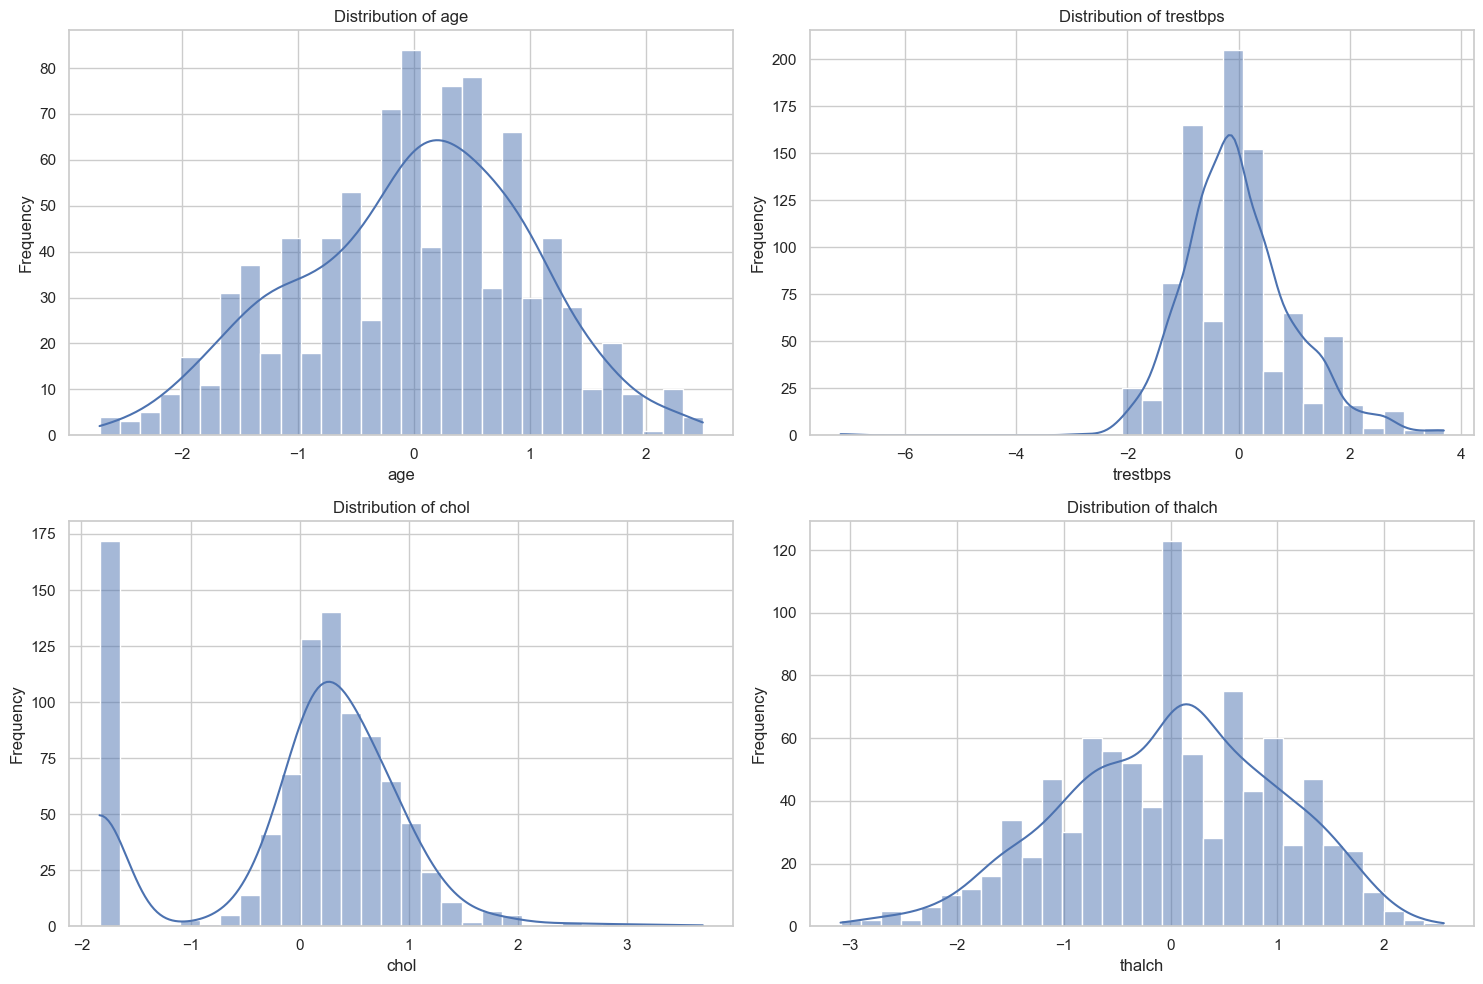

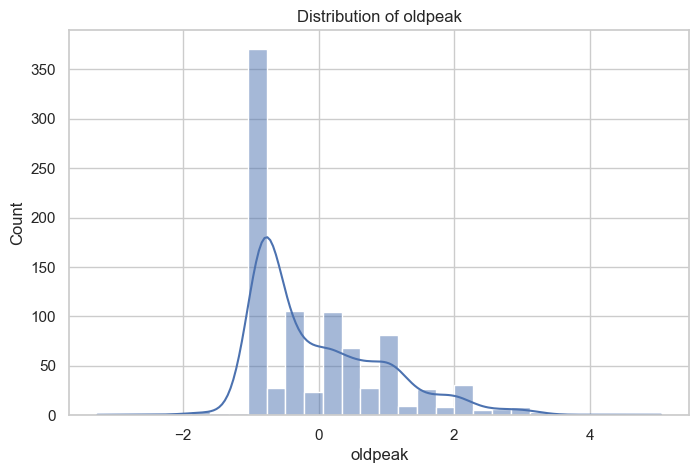

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# List of numerical features
num_features = ['age', 'trestbps', 'chol', 'thalch']

# Create subplots
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Oldpeak separately as it has different scale
plt.figure(figsize=(8, 5))
sns.histplot(df['oldpeak'], kde=True, bins=30)
plt.title('Distribution of oldpeak')
plt.show()

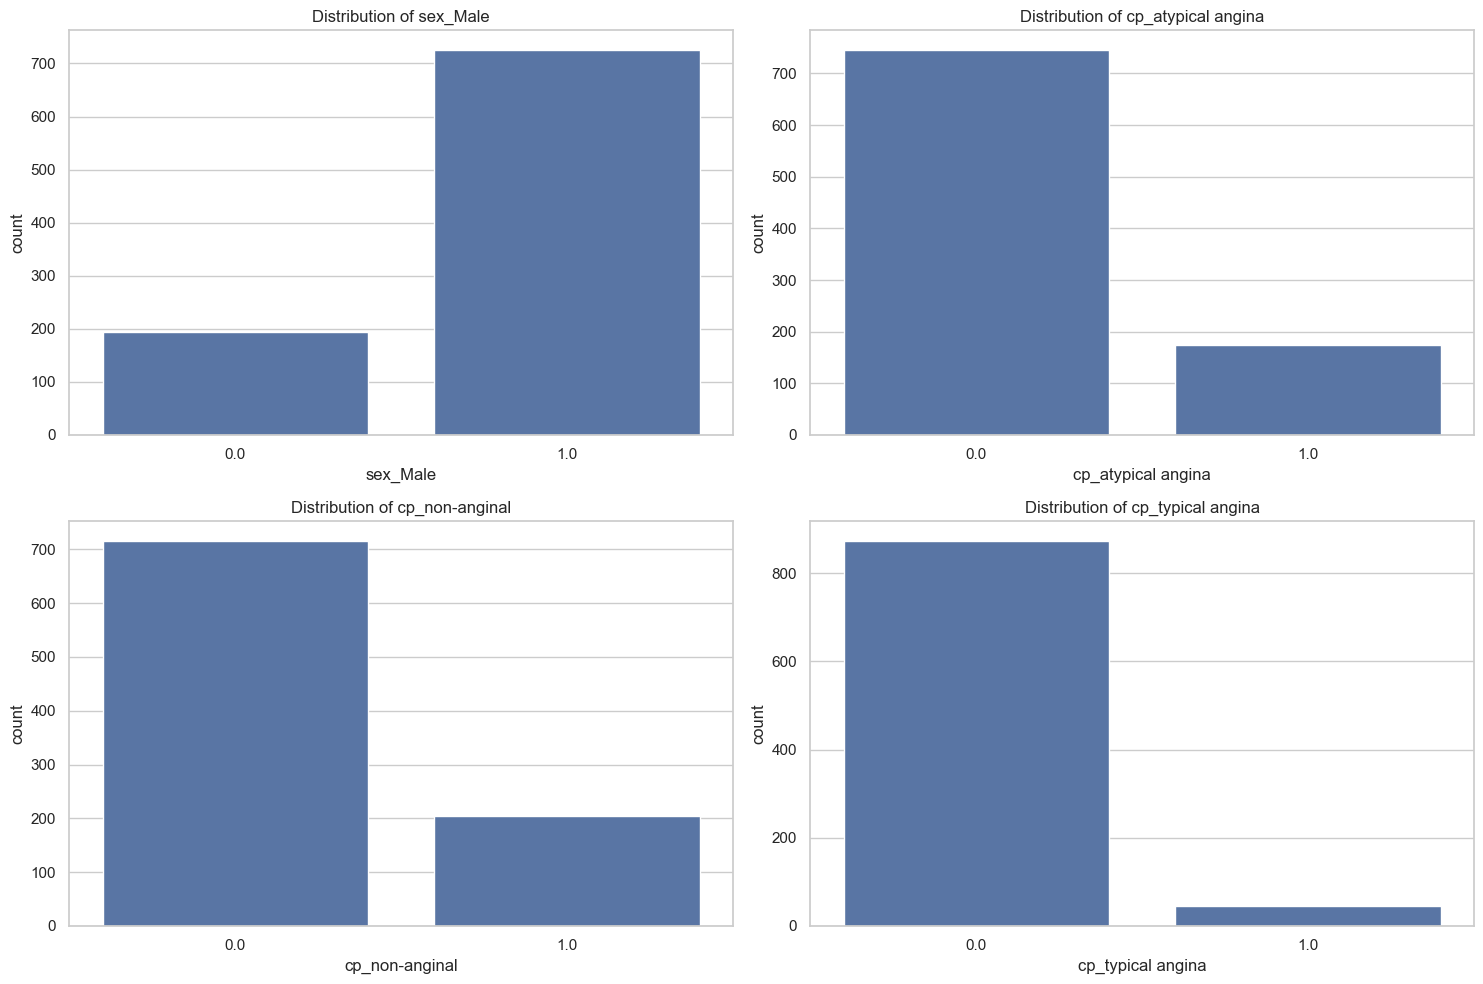

In [8]:
# Get all one-hot encoded columns
encoded_cols = [col for col in df.columns if any(cat in col for cat in ['sex', 'cp', 'fbs', 'exang'])]

plt.figure(figsize=(15, 10))
for i, col in enumerate(encoded_cols[:4], 1):  # Plot first 4 encoded columns
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


=== Numerical Features Distribution ===


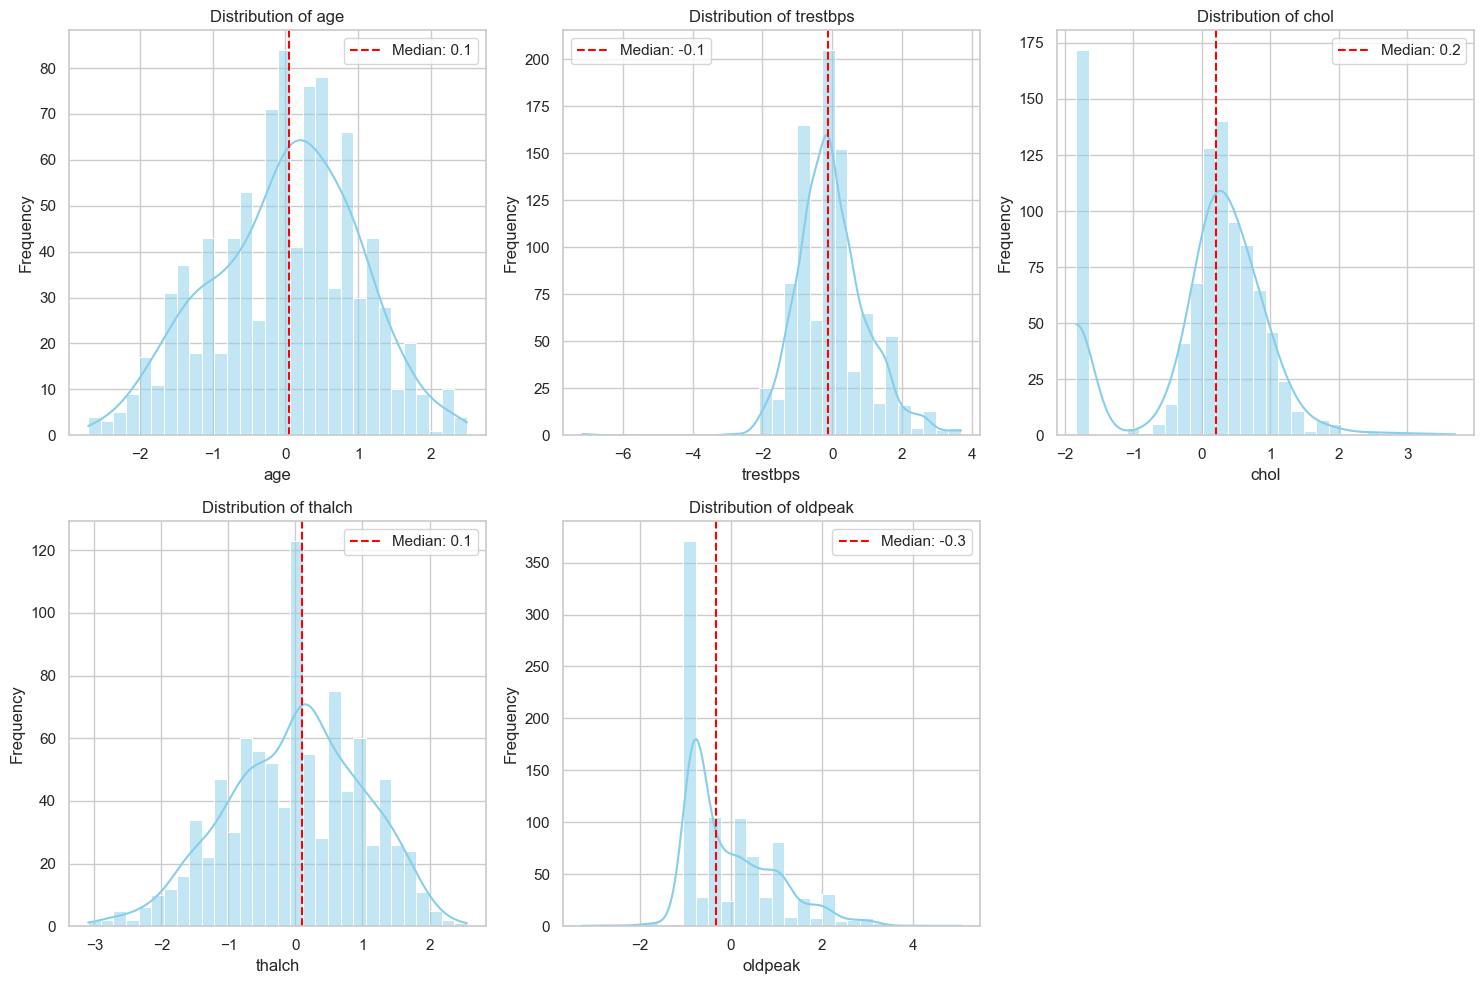


=== Categorical Features Distribution ===


C:\Users\Usuario\AppData\Local\Temp\ipykernel_33536\3552323701.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cp_counts.index, y=cp_counts.values, palette='Set2')


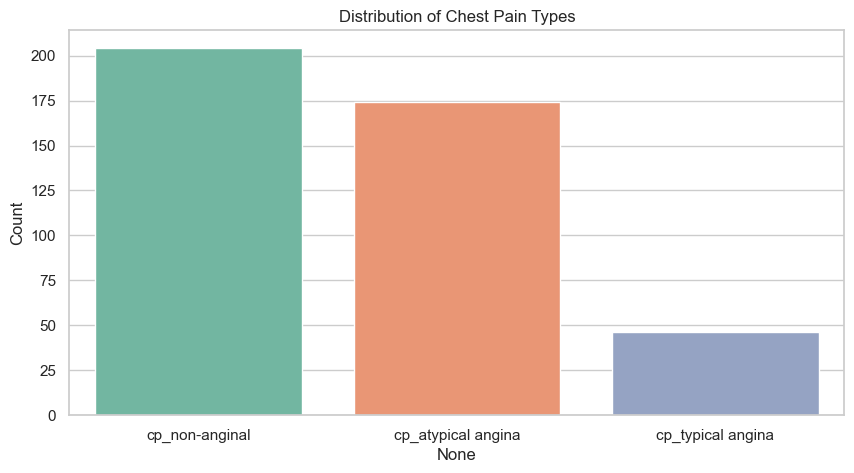


=== Correlation Analysis ===


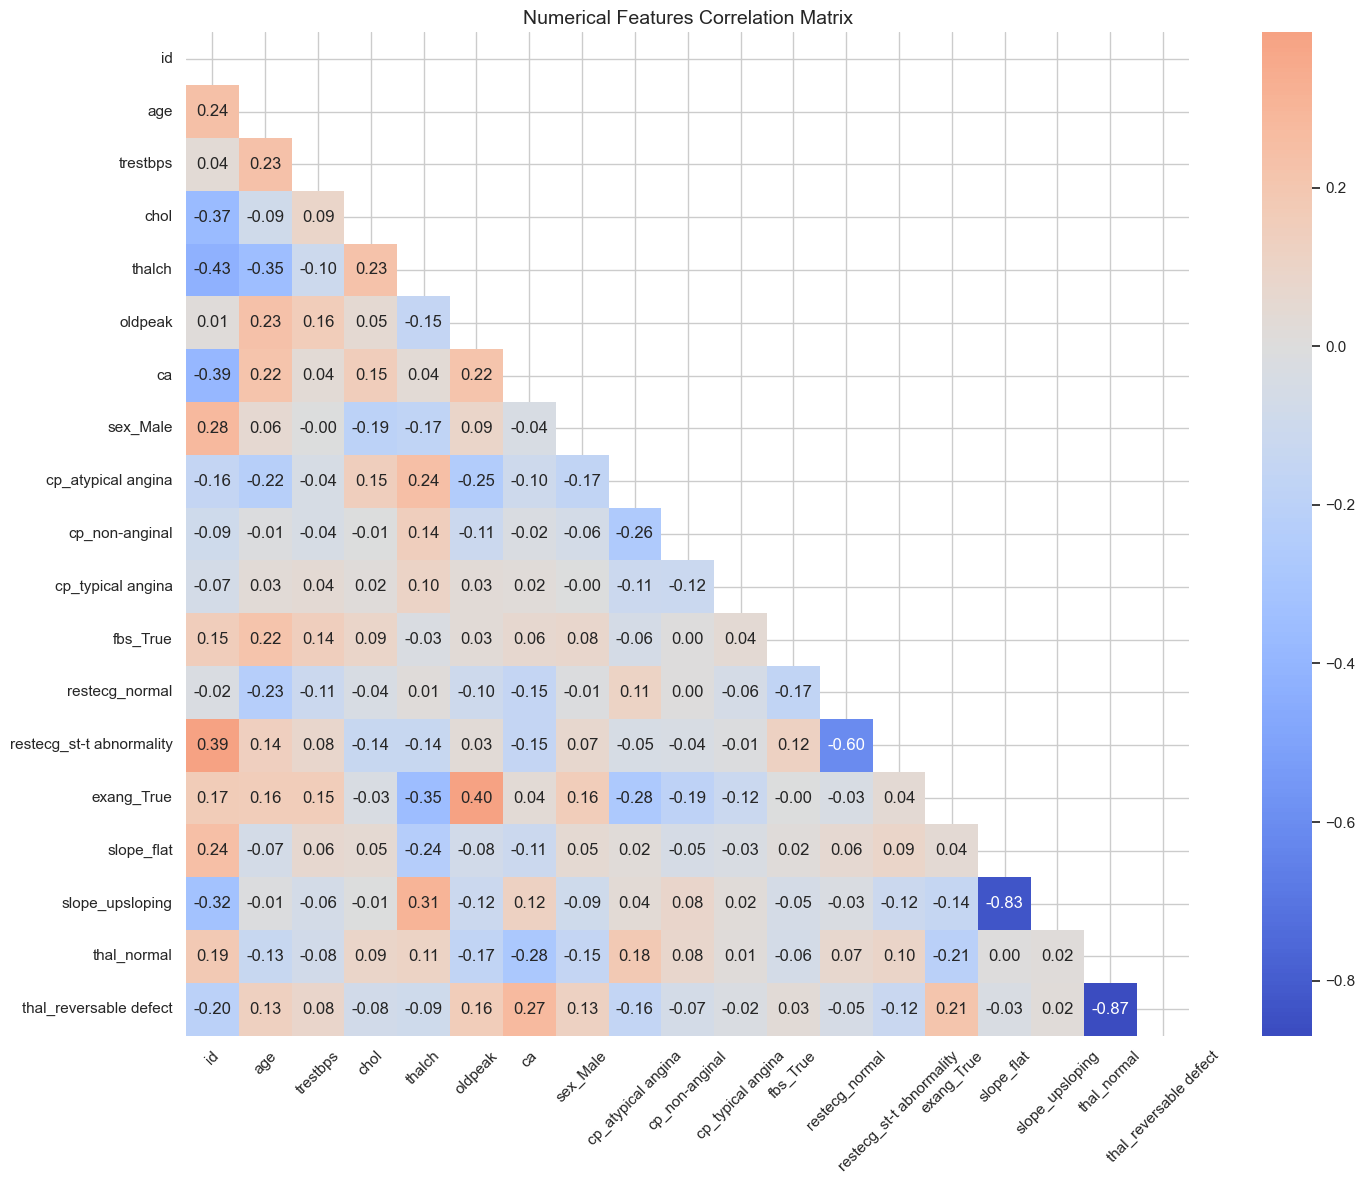


=== Target Variable Analysis ===


C:\Users\Usuario\AppData\Local\Temp\ipykernel_33536\3552323701.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='Set2')


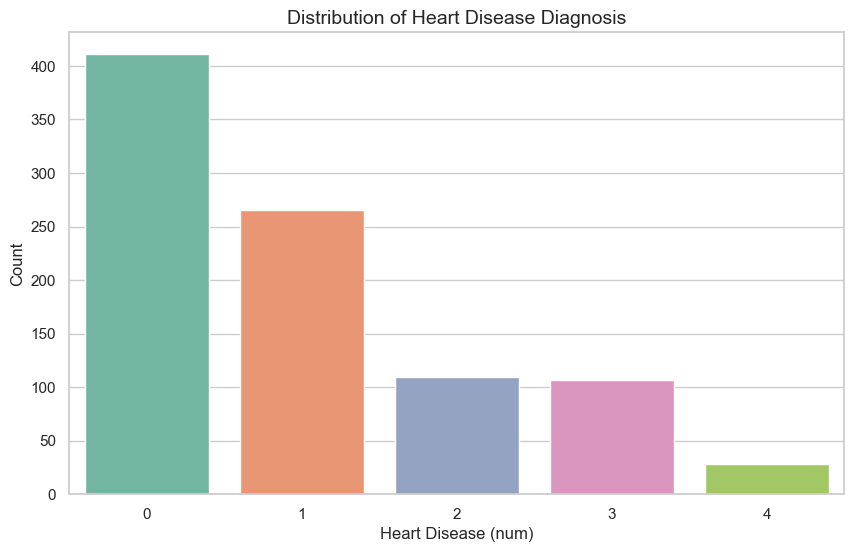


=== Numerical Features vs Target ===


C:\Users\Usuario\AppData\Local\Temp\ipykernel_33536\3552323701.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=feature, data=df, palette='Set2')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_33536\3552323701.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=feature, data=df, palette='Set2')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_33536\3552323701.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=feature, data=df, palette='Set2')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_33536\3552323701.p

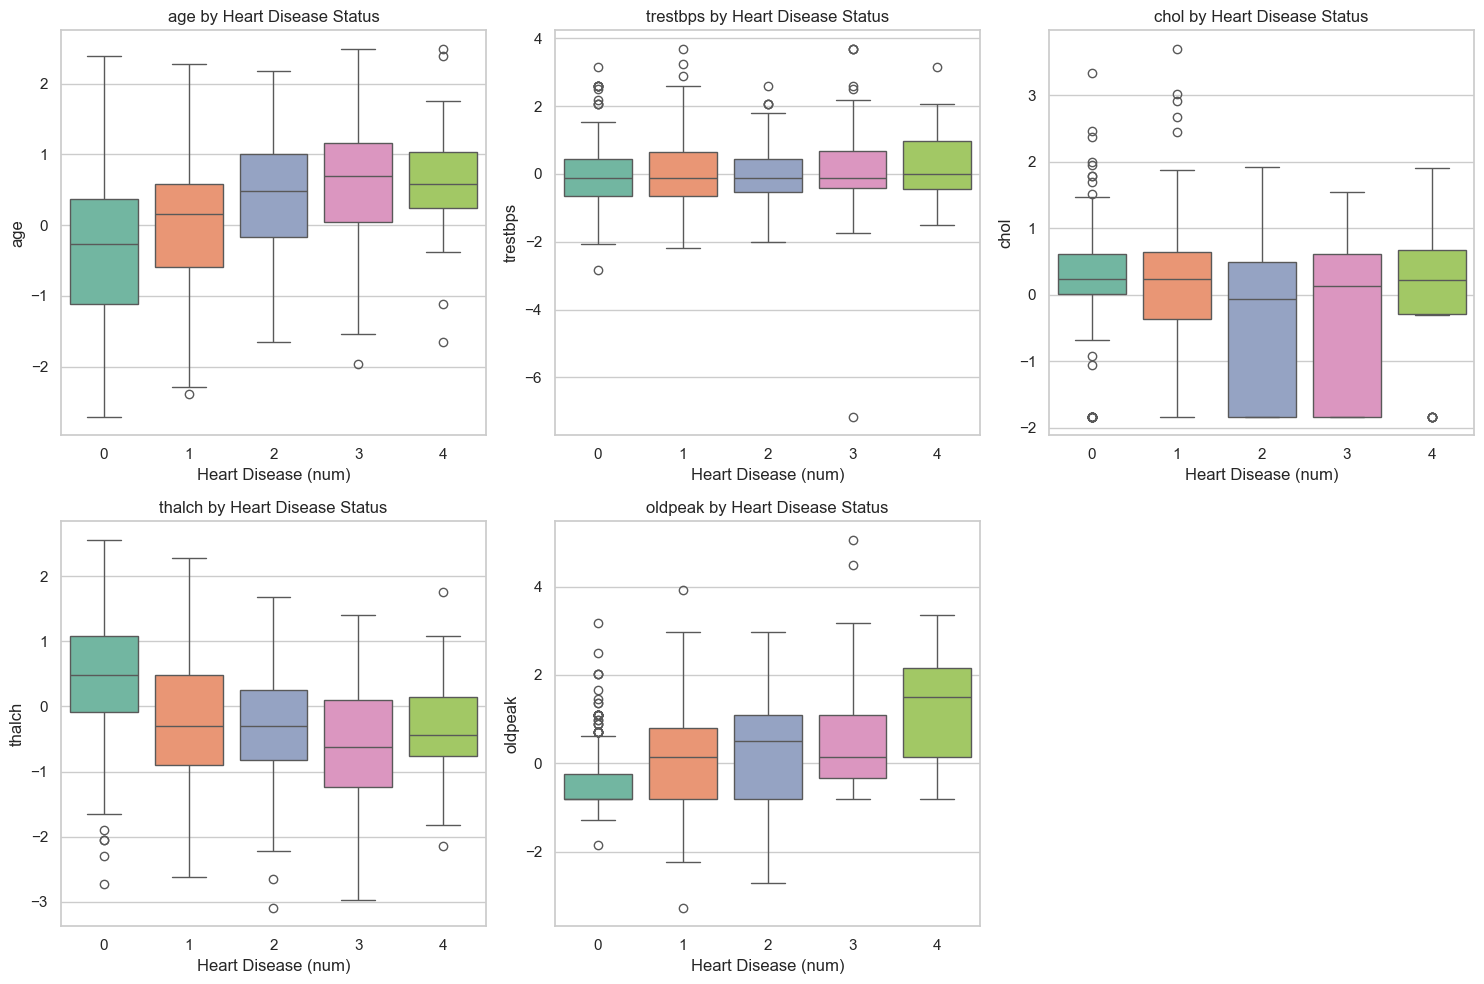

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for all plots
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# 1. Numerical Features Analysis
print("\n=== Numerical Features Distribution ===")
num_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Add median line
    median_val = df[feature].median()
    plt.axvline(median_val, color='red', linestyle='--', 
                label=f'Median: {median_val:.1f}')
    plt.legend()
    
plt.tight_layout()
plt.show()

# 2. Categorical Features Analysis
print("\n=== Categorical Features Distribution ===")

# First check if we have original categorical columns or encoded ones
if 'sex' in df.columns:  # If not one-hot encoded yet
    cat_features = ['sex', 'cp', 'fbs', 'exang']
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(cat_features, 1):
        plt.subplot(2, 2, i)
        sns.countplot(x=feature, data=df, palette='Set2')
        plt.title(f'Distribution of {feature}', fontsize=12)
        plt.xlabel(feature)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:  # If one-hot encoded
    # Example for sex (assuming it was encoded as sex_1)
    if 'sex_1' in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x='sex_1', data=df, palette='Set2')
        plt.title('Distribution of Encoded Sex (1=male)')
        plt.show()

    # Example for cp (chest pain type)
    cp_cols = [col for col in df.columns if col.startswith('cp_')]
    if cp_cols:
        cp_counts = df[cp_cols].sum().sort_values(ascending=False)
        plt.figure(figsize=(10, 5))
        sns.barplot(x=cp_counts.index, y=cp_counts.values, palette='Set2')
        plt.title('Distribution of Chest Pain Types')
        plt.ylabel('Count')
        plt.show()

# 3. Correlation Analysis (only numerical features)
print("\n=== Correlation Analysis ===")
# Select only numerical columns (excluding the target 'num' temporarily)
numerical_df = df.select_dtypes(include=[np.number])
if 'num' in numerical_df.columns:
    numerical_df = numerical_df.drop('num', axis=1)

plt.figure(figsize=(16, 12))
corr_matrix = numerical_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            center=0, mask=mask, square=True)
plt.title('Numerical Features Correlation Matrix', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Target Variable Analysis
print("\n=== Target Variable Analysis ===")
plt.figure(figsize=(10, 6))
sns.countplot(x='num', data=df, palette='Set2')
plt.title('Distribution of Heart Disease Diagnosis', fontsize=14)
plt.xlabel('Heart Disease (num)')
plt.ylabel('Count')
plt.show()

# 5. Numerical Features vs Target
print("\n=== Numerical Features vs Target ===")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='num', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Heart Disease Status', fontsize=12)
    plt.xlabel('Heart Disease (num)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [10]:
# Convert num to binary (0 = no disease, 1 = any heart disease)
df['target'] = (df['num'] > 0).astype(int)
y = df['target']
X = df.drop(['num', 'target'], axis=1)

# If dataset column exists and isn't needed
if 'dataset' in X.columns:
    X = X.drop('dataset', axis=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    # Store results
    results[name] = {
        'accuracy': model.score(X_test, y_test),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    # Print basic metrics
    print(f"\n{name} Performance:")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"ROC AUC: {results[name]['roc_auc']:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.8478
ROC AUC: 0.9162
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        82
           1       0.84      0.90      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184


Random Forest Performance:
Accuracy: 0.8804
ROC AUC: 0.9589
              precision    recall  f1-score   support

           0       0.93      0.79      0.86        82
           1       0.85      0.95      0.90       102

    accuracy                           0.88       184
   macro avg       0.89      0.87      0.88       184
weighted avg       0.89      0.88      0.88       184


XGBoost Performance:
Accuracy: 0.8750
ROC AUC: 0.9378
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        82
           1       0.87      0.91      0.89       102


In [14]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid=rf_params,
                      cv=5,
                      scoring='roc_auc',
                      n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best ROC AUC:", rf_grid.best_score_)

Best Random Forest Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC AUC: 0.9289362459281157


In [15]:
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, (y_train == 0).sum()/(y_train == 1).sum()]  # Handle imbalance
}

xgb_grid = GridSearchCV(XGBClassifier(random_state=42),
                       param_grid=xgb_params,
                       cv=5,
                       scoring='roc_auc',
                       n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best ROC AUC:", xgb_grid.best_score_)

Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'scale_pos_weight': 1, 'subsample': 1.0}
Best ROC AUC: 0.9371487440593131


<Figure size 1000x800 with 0 Axes>

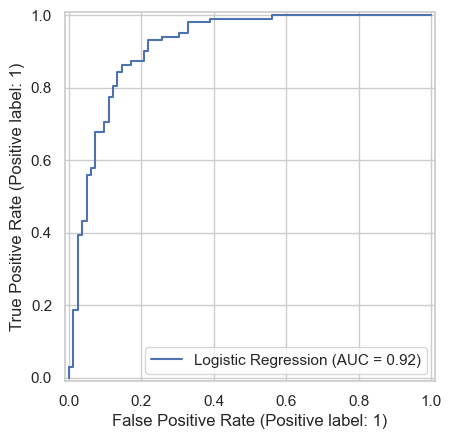

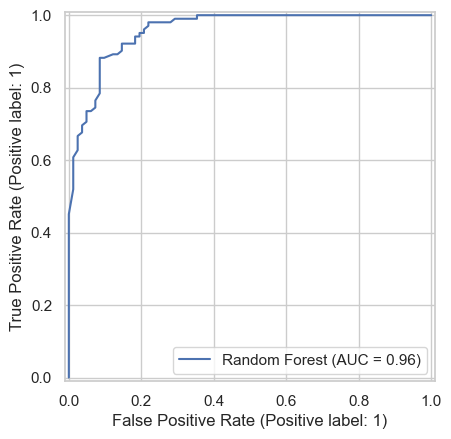

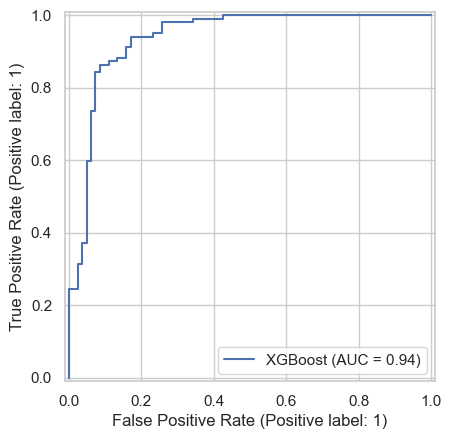

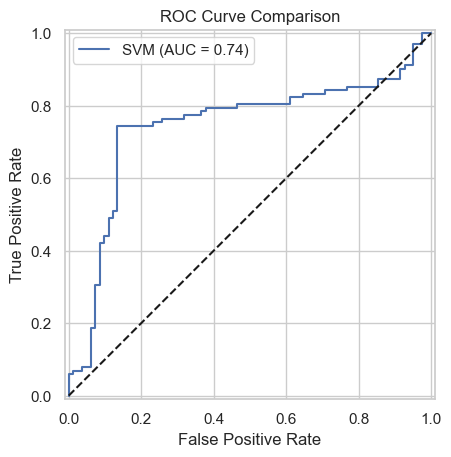

In [16]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 8))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Final Model Performance:
Accuracy: 0.9022
ROC AUC: 0.9529
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        82
           1       0.88      0.96      0.92       102

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.91      0.90      0.90       184



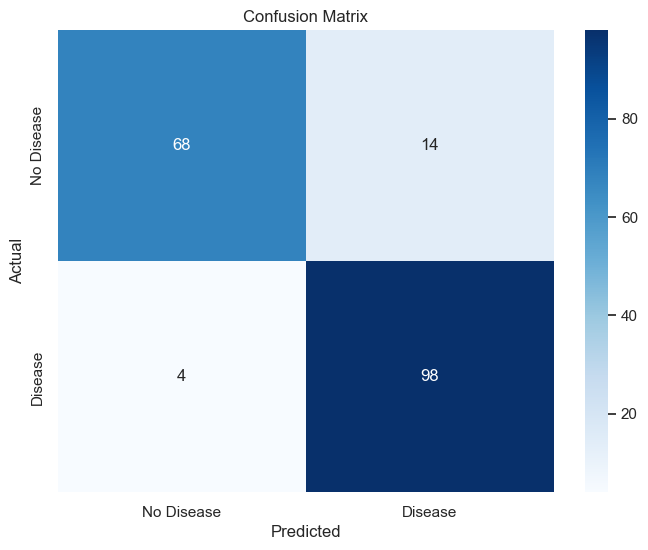

In [18]:
# Import all required metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Final Model Evaluation
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("\nFinal Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()